# Ejemplo de un archivo IPNB

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv("vgsales.csv")


In [14]:
# df.head(10)  # muestra las primeras n filas 
# df.tail(n) nos muestra las ultimas n filas
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [16]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [17]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [18]:
df["Name"].dtype

dtype('O')

In [19]:
numeric_columns=[col for col in df.columns if df[col].dtype != "O"]
object_columns=[col for col in df.columns if df[col].dtype == "O"]


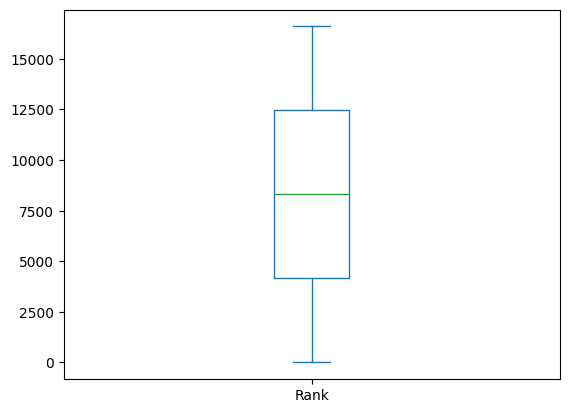

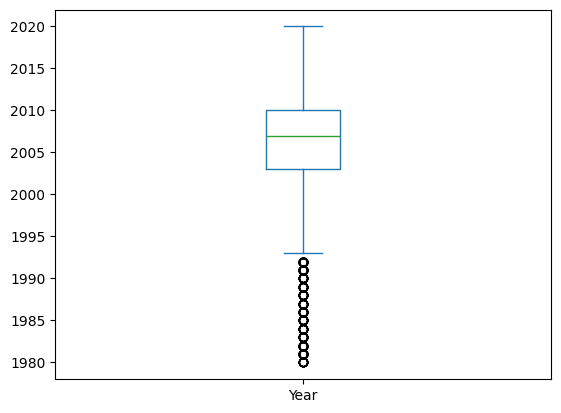

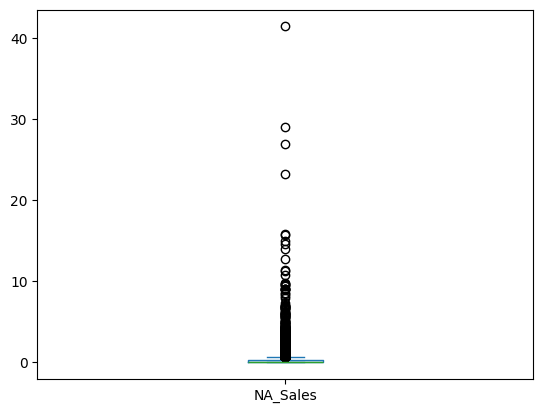

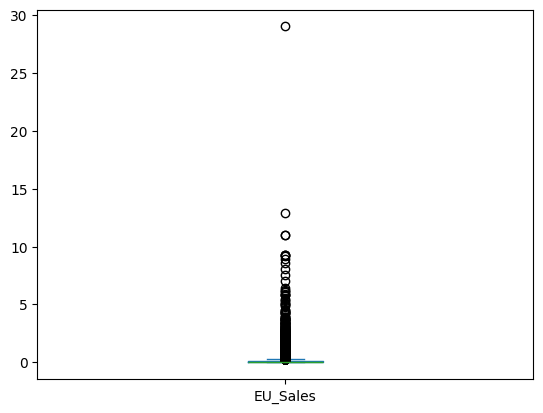

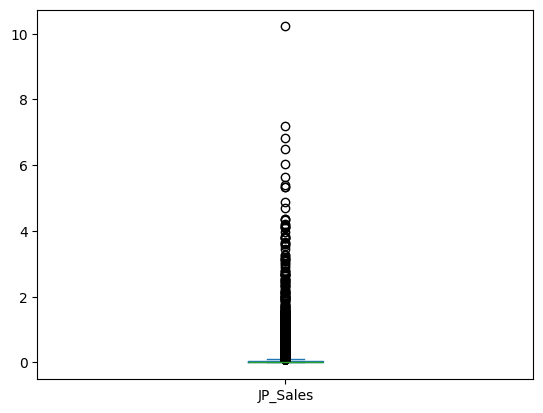

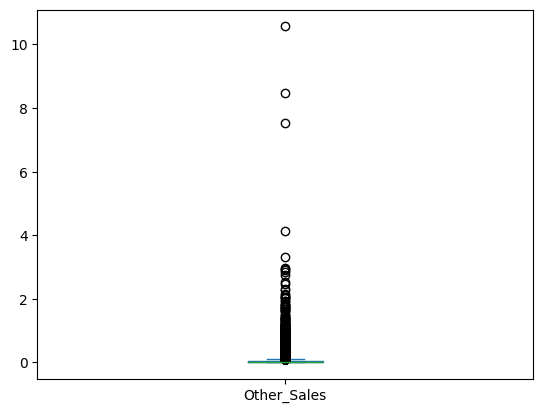

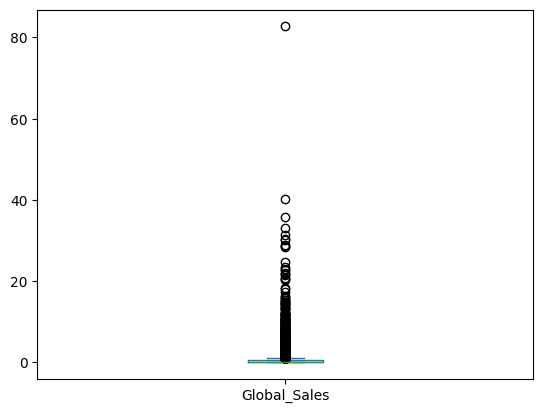

In [20]:
# df["Year"].plot.box()

for col in numeric_columns:
    df[col].plot.box()
    plt.show()

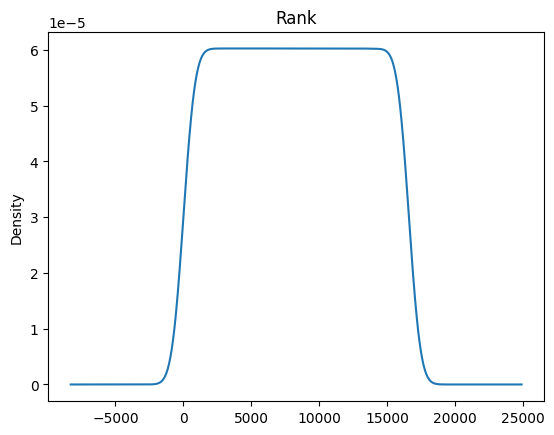

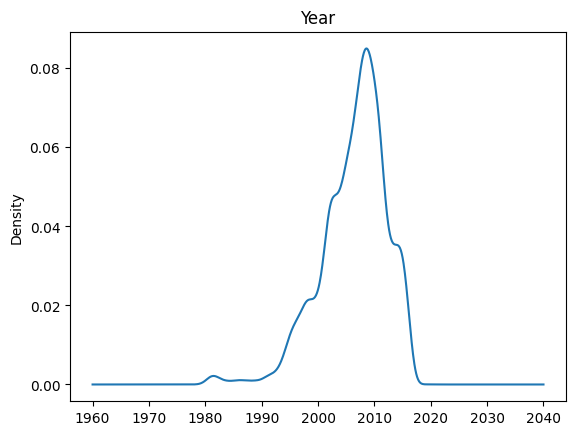

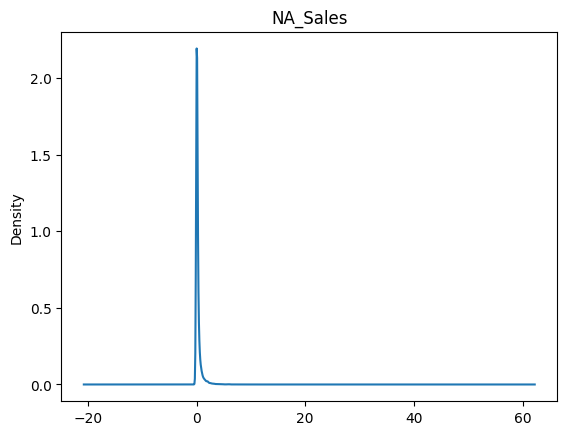

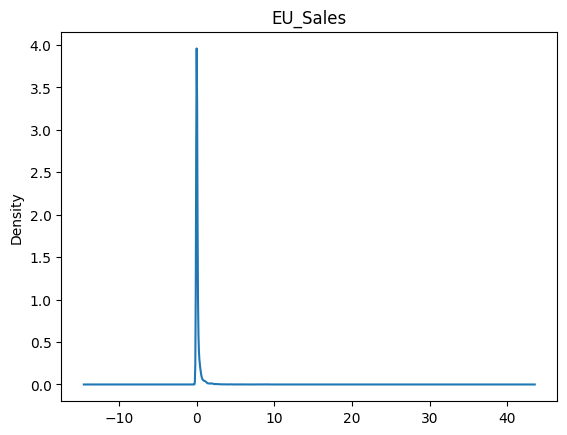

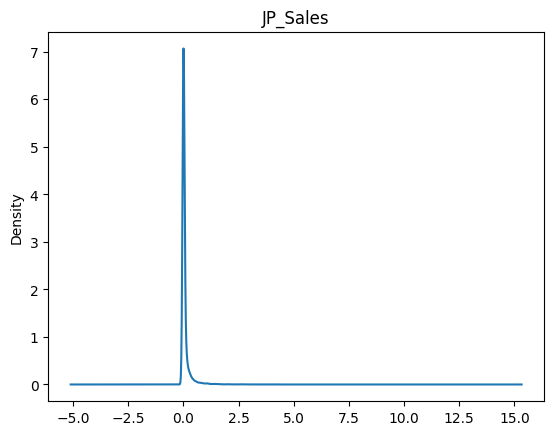

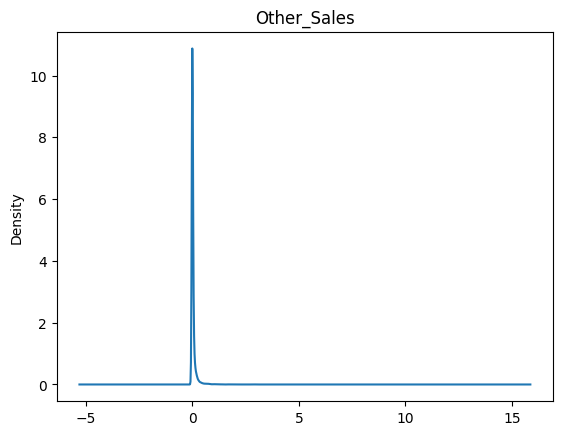

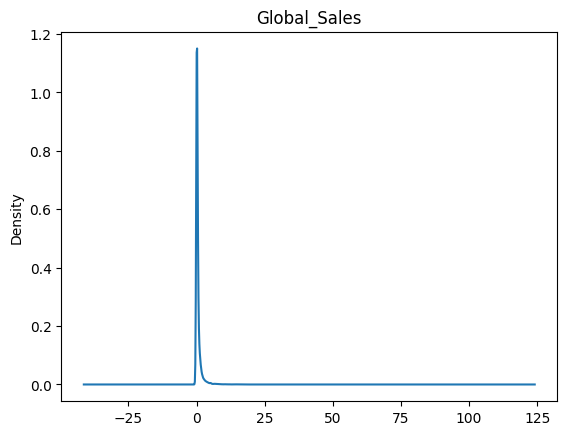

In [22]:
for col in numeric_columns:
    df[col].plot.kde(title=col)
    plt.show()

In [26]:
print(f'Medidas de Tendencia Central')
print(f'Suma: {df["Year"].sum()}')
print(f'Promedio: {df["Year"].mean()}')
print(f'Mediana: {df["Year"].median()}')
print(f'Moda: {df["Year"].mode()}')
print(f'Medidas de Disperción')
print(f'Desv. Estandar: {df["Year"].std()}')
print(f'Varianza: {df["Year"].var()}')
print(f'Medidas de Posición')
print(f'min: {df["Year"].min()}')
print(f'Q1: {df["Year"].quantile(0.25)}')
print(f'Q2: {df["Year"].quantile(0.5)}')
print(f'Q3: {df["Year"].quantile(0.75)}')
print(f'max: {df["Year"].max()}')

Medidas de Tendencia Central
Suma: 32758598.0
Promedio: 2006.4064433147546
Mediana: 2007.0
Moda: 0    2009.0
Name: Year, dtype: float64
Medidas de Disperción
Desv. Estandar: 5.828981114712805
Varianza: 33.97702083567854
Medidas de Posición
min: 1980.0
Q1: 2003.0
Q2: 2007.0
Q3: 2010.0
max: 2020.0


In [28]:
# df[mascara]
df[df["Year"]<=1990][["Name", "Platform"]]

,Name,Platform
1,Super Mario Bros.,NES
5,Tetris,GB
9,Duck Hunt,NES
18,Super Mario World,SNES
21,Super Mario Land,GB
...,...,...
11749,Super Baseball,2600
12636,Adventures of Lolo,NES
14335,Alter Ego,PC
14507,SimCity,PC


In [32]:
#Todos los juegos pubicados por nintendo después del 2000
# / or
# & and
# ~ not


df[(df['Year'] > 2000) & (df['Publisher'] == 'Nintendo')]['Name']

0                                               Wii Sports
2                                           Mario Kart Wii
3                                        Wii Sports Resort
6                                    New Super Mario Bros.
7                                                 Wii Play
                               ...                        
16269                             Slide Adventure: Mag Kid
16357                 Mario vs. Donkey Kong: Tipping Stars
16456                             Art Academy: Home Studio
16473                                      Captain Rainbow
16542    Mario & Luigi: Paper Jam & Mario Kart 7 Double...
Name: Name, Length: 502, dtype: object

In [29]:
# df[
#     (df ["Platform"]=="PS") |
#     (df ["Platform"]=="N64") |
#     (df ["Platform"]=="SAT")]["Name"]

df[df["Platform"]]

46                      Super Mario 64
52                        Gran Turismo
63                       Mario Kart 64
66                   Final Fantasy VII
69                      Gran Turismo 2
                     ...              
16506    Samurai Shodown: Warrios Rage
16518                 Crossroad Crisis
16554                Psychic Detective
16579                PGA European Tour
16583                   Carmageddon 64
Name: Name, Length: 1688, dtype: object

In [30]:
df["NA_Sales"].nlargest(3)          #n datos mas grandes
df["NA_Sales"].nsmallest(3)         #n datos mas pequeños
df.nsmallest(n=5, columns=["NA_Sales"])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.0,0.00,4.87,0.00,4.87
338,339,Friend Collection,DS,2009.0,Misc,Nintendo,0.0,0.00,3.67,0.00,3.67
383,384,Monster Hunter 4,3DS,2013.0,Role-Playing,Capcom,0.0,0.00,3.44,0.00,3.44
402,403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,Nintendo,0.0,0.99,2.32,0.02,3.33
426,427,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,Enix Corporation,0.0,0.00,3.19,0.00,3.19


In [31]:
df["Platform"].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [33]:
df["Year"].value_counts(bins=10)

(2004.0, 2008.0]      4579
(2008.0, 2012.0]      4486
(2000.0, 2004.0]      2849
(2012.0, 2016.0]      2086
(1996.0, 2000.0]      1355
(1992.0, 1996.0]       663
(1979.959, 1984.0]     122
(1988.0, 1992.0]       117
(1984.0, 1988.0]        66
(2016.0, 2020.0]         4
Name: count, dtype: int64